<a href="https://colab.research.google.com/github/PrachiSaroj/YOLO-Based-Real-Time-Object-Detection/blob/main/Use_Webcam_%2B_YOLOv5_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installing Libraries



In [ ]:
# Install YOLOv5
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

# Install OpenCV
!pip install opencv-python
!pip install opencv-python-headless

Cloning into 'yolov5'...
remote: Enumerating objects: 17483, done.
remote: Total 17483 (delta 0), reused 0 (delta 0), pack-reused 17483 (from 1)
Receiving objects: 100% (17483/17483), 16.53 MiB | 13.21 MiB/s, done.
Resolving deltas: 100% (11988/11988), done.
/content/yolov5/yolov5


## MAJOR PROJECT

In [ ]:
#IMAGE_TO_VOICE_ASSISTANT_
#MAJOR PROJECT
#GAUTAM BUDDHA UNIVERSITY




#IMAGE_TO_VOICE_ASSISTANT_
#MAJOR PROJECT
#GAUTAM BUDDHA UNIVERSITY



#IMAGE_TO_VOICE_ASSISTANT_
#MAJOR PROJECT
#GAUTAM BUDDHA UNIVERSITY



#IMAGE_TO_VOICE_ASSISTANT_
#MAJOR PROJECT
#GAUTAM BUDDHA UNIVERSITY

##Import Required Libraries

In [ ]:
import torch
import cv2
import numpy as np
from IPython.display import display, Image, clear_output
import PIL
from PIL import Image as PILImage
import time

Loading Pretrained YOLOv5 Model

In [ ]:
# Load YOLOv5s model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-5-27 Python-3.11.12 torch-2.6.0+cu124 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 166MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Enable Webcam

In [ ]:
# This code opens webcam in Colab using JavaScript
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode

def capture_image():
    js = Javascript('''
        async function takePhoto() {
          const div = document.createElement('div');
          const capture = document.createElement('button');
          capture.textContent = 'Capture';
          div.appendChild(capture);

          const video = document.createElement('video');
          video.style.display = 'block';
          const stream = await navigator.mediaDevices.getUserMedia({video: true});
          document.body.appendChild(div);
          div.appendChild(video);
          video.srcObject = stream;
          await video.play();

          // Resize video element
          google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

          await new Promise((resolve) => capture.onclick = resolve);

          const canvas = document.createElement('canvas');
          canvas.width = video.videoWidth;
          canvas.height = video.videoHeight;
          canvas.getContext('2d').drawImage(video, 0, 0);
          stream.getTracks().forEach(track => track.stop());
          div.remove();
          return canvas.toDataURL('image/jpeg', 0.8);
        }
        takePhoto();
    ''')

    display(js)
    data = eval_js('takePhoto()')
    binary = b64decode(data.split(',')[1])
    with open('photo.jpg', 'wb') as f:
        f.write(binary)

    img = cv2.imread('photo.jpg')
    return img

Capturing Frame and Detect Objects

<IPython.core.display.Javascript object>

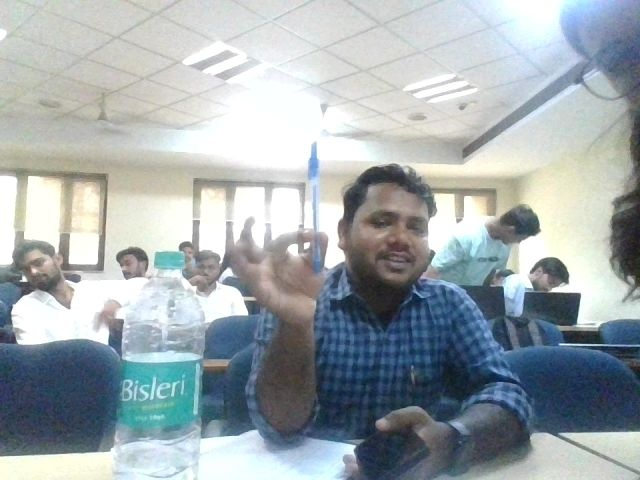

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


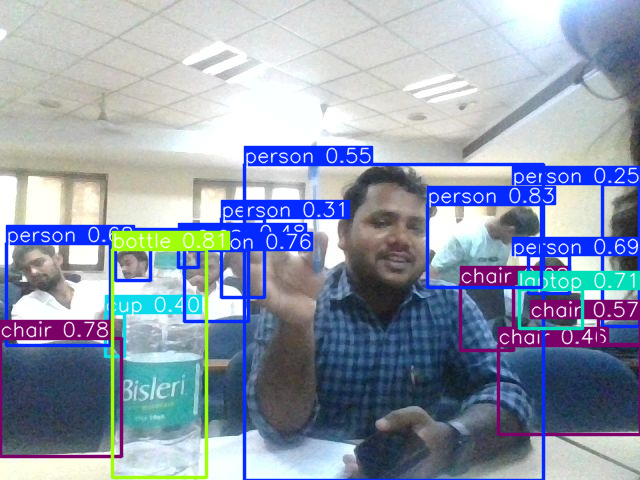

In [ ]:
# Capture an image from webcam
img = capture_image()

# Save and display captured image
cv2.imwrite("captured_frame.jpg", img)
display(PILImage.open("captured_frame.jpg"))

# Run YOLOv5 detection
results = model('captured_frame.jpg')

# Display results
results.show()